# Data Cleaning & Augmentation

## Load Wine Review Data

Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import kagglehub

import matplotlib.pyplot as plt
import seaborn as sns

Source: Kaggle [Wine Reviews](https://www.kaggle.com/datasets/zynicide/wine-reviews)

In [3]:
# Download latest version
path = kagglehub.dataset_download("christopheiv/winemagdata130k")
fname = 'winemag-data-130k-v2.csv'
reviews = pd.read_csv(os.path.join(path, fname), index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Data Cleanup

## Drop columns that are not useful

See [wine_review-initial_data_exploration.ipynb](wine_review-initial_data_exploration.ipynb) for explanation.

In [4]:
# drop columns that are not useful
reviews.drop(columns=['designation', 'region_2', 'taster_twitter_handle'], inplace=True)
reviews.head()

,country,description,points,price,province,region_1,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Reduce the dataset

Focus on the top $50$ wine varieties reviewed, from countries with more than $200$ reviews.

In [5]:
n_varieries = 50
top_varieties = set(reviews.groupby('variety')[['title']].count().rename(columns={'title': 'count'}).reset_index().sort_values('count', ascending=False).head(n_varieries).variety.unique())
np.array(list(top_varieties))

array(['Zinfandel', 'Carmenère', 'Portuguese Red', 'Verdejo',
       'Tempranillo', 'Garnacha', 'Rhône-style White Blend',
       'Champagne Blend', 'Sangiovese', 'Grüner Veltliner',
       'Sauvignon Blanc', 'Cabernet Franc', 'Bordeaux-style White Blend',
       'Moscato', 'Grenache', 'Aglianico', 'Sparkling Blend', 'Riesling',
       'Pinot Gris', 'Corvina, Rondinella, Molinara', 'Merlot',
       'Portuguese White', 'Rhône-style Red Blend', 'Pinot Noir',
       'Nebbiolo', 'Tempranillo Blend', 'Glera', 'Sauvignon',
       'Gewürztraminer', 'Port', 'Albariño', "Nero d'Avola", 'Shiraz',
       'White Blend', 'Gamay', 'Rosé', 'Pinot Grigio', 'Chardonnay',
       'Red Blend', 'Sangiovese Grosso', 'Chenin Blanc', 'Syrah',
       'Viognier', 'Barbera', 'Pinot Blanc', 'Melon', 'Malbec',
       'Petite Sirah', 'Cabernet Sauvignon', 'Bordeaux-style Red Blend'],
      dtype='<U29')

In [6]:
cut_off = 200
top_countries = set(reviews.groupby('country')[['title']].count().rename(columns={'title': 'count'}).reset_index().sort_values('count', ascending=False).query(f'count > {cut_off}').country.unique())
np.array(list(top_countries))

array(['Argentina', 'Israel', 'Australia', 'Austria', 'Italy', 'Chile',
       'US', 'Greece', 'Germany', 'Spain', 'South Africa', 'France',
       'New Zealand', 'Canada', 'Portugal'], dtype='<U12')

In [7]:
# reviews from the top countries and top wine varieties
reduced = reviews[reviews.country.isin(top_countries) & reviews.variety.isin(top_varieties)].copy()
reduced

,country,description,points,price,province,region_1,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,NaN,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


# Data Augmentation

### Extract vintage year from `title`

In [8]:
import re

title_pattern = re.compile(r'\D(19[0-9]{2}|20[0-9]{2})')

# extract vintage year from title, if it exists
def vintage(title):
  m = title_pattern.findall(title)
  if len(m) > 0:
    m = title_pattern.findall(title)
    m.sort()
    return int(m[-1])
  return None

In [9]:
reduced['year'] = reduced.title.apply(vintage)
reduced.head()

,country,description,points,price,province,region_1,taster_name,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0


### Derive `style` of Wine from `variety`

See [Learn Wine With The 9 Major Styles
](https://winefolly.com/tips/the-9-major-wine-styles/) for explanation

In [10]:
styles = {
  'full_red': [
    'Syrah', 'Shiraz','Cabernet Sauvignon','Monastrell','Malbec','Montepulciano','Aglianico','Dolcetto','Rhône-style White Blend',
    'Petite Sirah','Nebbiolo','Tempranillo','Nero d\'Avola','Sagrantino','Tannat','Zinfandel','Tempranillo Blend','Bordeaux-style Red Blend',

  ],
  'medium_red': [
    'Sangiovese','Grenache','Merlot','Negroamaro','Barbera','Cabernet Franc','Valpolicella','Corvina, Rondinella, Molinara',
    'Sangiovese Grosso', 'Carmenère', 'Rhône-style Red Blend','Red Blend',
    'Portuguese Red','Garnacha',
  ],
  'light_red': ['Pinot Noir','Cinsault','Gamay','Ciliegiolo','Freisa','Schiava','Brachetto',],
  'rose': ['Rosé', 'Garnacha Rosé', 'Côtes du Rhône Rosé', 'Provence Rosé', 'Sangiovese Rosé', 'Mourvèdre Rosé', 'Pinot Noir Rosé'],
  'full_white': ['Chardonnay','Sémillon','Viognier','Marsanne',],
  'light_white': [
    'Albariño','Garganega','Grüner Veltliner','Pinot Gris','Pinot Grigio','Sauvignon Blanc',
    'Verdicchio','Verdejo','Vermentino', 'Melon','Pinot Blanc','Bordeaux-style White Blend',
    'White Blend','Portuguese White'
  ],
  'aromatic_white': ['Chenin Blanc','Gewürztraminer','Muscat Blanc','Moscato','Riesling','Torrontés','Glera', 'Sauvignon'],
  'dessert': ['Port','Sherry','Madeira','Late Harvest Wines','Noble Rot Wines',],
  'sparkling': ['Sparkling Blend', 'Champagne Blend', 'Champagne','Cava','Prosecco','Metodo Classico','Sparkling Wine','Sekt','Lambrusco',],
}

def classify_style(variety: str) -> str:
  for style in styles:
    if variety in styles[style]:
      return style
  return None


reduced['wine_style'] = reduced.variety.apply(classify_style)
reduced.head()

,country,description,points,price,province,region_1,taster_name,title,variety,winery,year,wine_style
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0,light_white
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0,medium_red
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0,light_white
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0,aromatic_white
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0,light_red


In [11]:
# count of reviews by style
assert reduced.wine_style.value_counts().sum() == reduced.shape[0], "some varieties could not be classified into a style"
reduced.wine_style.value_counts().to_frame()

,count
wine_style,
full_red,33725
medium_red,23461
light_white,14704
light_red,14235
full_white,12665
aromatic_white,8129
rose,3533
sparkling,3472
dessert,668


**Simpler classification of type of wine**

In [12]:
# define the white wine varieties
white = {
  'Chardonnay', 'Riesling', 'Sauvignon Blanc', 'White Blend', 'Pinot Gris', 'Grüner Veltliner', 'Portuguese White', 
  'Bordeaux-style White Blend', 'Pinot Grigio', 'Gewürztraminer', 'Viognier', 'Glera', 'Chenin Blanc', 'Albariño', 
  'Pinot Blanc', 'Rhône-style White Blend', 'Moscato', 'Sauvignon', 'Verdejo', 'Melon'
}

# verify that white wine varieties are valid
assert white.issubset(top_varieties), 'invalid white wine variety'

# verify that rose wine varieties are valid
rose = {'Rosé'}
assert rose.issubset(top_varieties), 'invalid rose wine variety'

# define the sparkling wine varieties
sparkling = {'Sparkling Blend', 'Champagne Blend'}

# verify that sparkling wine varieties are valid
assert sparkling.issubset(top_varieties), 'invalid sparkling wine variety'

# verify that dessert wine varieties are valid
dessert = {'Port'}
assert dessert.issubset(top_varieties), 'invalid dessert wine variety'

# remaining wines are all red wines
red = top_varieties - white  - rose - sparkling - dessert

# verify that red wine varieties are valid
assert red.union(white).union(sparkling).union(dessert).union(rose) == top_varieties, 'invalid red wine variety'

np.array(list(red))

array(['Zinfandel', 'Carmenère', 'Portuguese Red', 'Tempranillo',
       'Garnacha', 'Tempranillo Blend', "Nero d'Avola", 'Sangiovese',
       'Shiraz', 'Gamay', 'Cabernet Franc', 'Red Blend', 'Grenache',
       'Aglianico', 'Sangiovese Grosso', 'Corvina, Rondinella, Molinara',
       'Syrah', 'Merlot', 'Barbera', 'Rhône-style Red Blend', 'Malbec',
       'Petite Sirah', 'Pinot Noir', 'Cabernet Sauvignon',
       'Bordeaux-style Red Blend', 'Nebbiolo'], dtype='<U29')

In [13]:
# set the wine type
reduced.loc[reduced.variety.isin(red), 'type'] = 'red'
reduced.loc[reduced.variety.isin(rose), 'type'] = 'rose'
reduced.loc[reduced.variety.isin(white), 'type'] = 'white'
reduced.loc[reduced.variety.isin(sparkling), 'type'] = 'sparkling'
reduced.loc[reduced.variety.isin(dessert), 'type'] = 'dessert'
reduced.head()

,country,description,points,price,province,region_1,taster_name,title,variety,winery,year,wine_style,type
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0,light_white,white
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0,medium_red,red
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0,light_white,white
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0,aromatic_white,white
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0,light_red,red


In [14]:
# count of reviews by type
assert reduced.type.value_counts().sum() == reduced.shape[0], "some varieties could not be classified into a type"
reduced.type.value_counts().to_frame()

,count
type,
red,70996
white,35923
rose,3533
sparkling,3472
dessert,668


### Derive Quality of Wine from `points`

In [15]:
reduced['quality'] = reduced.points.apply(lambda points: 'medium' if points < 90 else 'high')
reduced.head()

,country,description,points,price,province,region_1,taster_name,title,variety,winery,year,wine_style,type,quality
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0,light_white,white,medium
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0,medium_red,red,medium
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0,light_white,white,medium
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0,aromatic_white,white,medium
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0,light_red,red,medium


### Derive the *old* vs *new* *world wine* classification from `country`

In [16]:
# assign top countries to old and new world classification
old_world = {'France','Italy','Spain','Portugal','Austria','Germany','Israel','Greece'}
new_world = {'US','Chile','Argentina','Australia','New Zealand','South Africa','Canada'}

reduced['classification'] = reduced.country.apply(lambda country: 'Old World' if country in old_world else 'New World')
reduced.head()

,country,description,points,price,province,region_1,taster_name,title,variety,winery,year,wine_style,type,quality,classification
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0,light_white,white,medium,Old World
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0,medium_red,red,medium,Old World
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0,light_white,white,medium,New World
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0,aromatic_white,white,medium,New World
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0,light_red,red,medium,New World


In [17]:
# count of reviews by classification
reduced.classification.value_counts().to_frame()

,count
classification,
New World,63750
Old World,50842


### Derive Location of Wine from `province`, `region_1`, and `region_2`

**Use `region_1` value when province includes country name, like** *Northern Spain*

In [18]:
reduced['location'] = reduced.apply(lambda row: row.region_1 if row.country in row.province else row.province, axis=1)
reduced.head()

,country,description,points,price,province,region_1,taster_name,title,variety,winery,year,wine_style,type,quality,classification,location
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0,light_white,white,medium,Old World,Sicily & Sardinia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0,medium_red,red,medium,Old World,Douro
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0,light_white,white,medium,New World,Oregon
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0,aromatic_white,white,medium,New World,Michigan
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0,light_red,red,medium,New World,Oregon


**Replace provinces with value** *Other* **with `region_1` value**

In [19]:
reduced.loc[reduced.location == 'Other', 'location'] = reduced.loc[reduced.location == 'Other', 'region_1']
reduced[reduced.province == 'Other'].head()

,country,description,points,price,province,region_1,taster_name,title,variety,winery,year,wine_style,type,quality,classification,location
16,Argentina,"Baked plum, molasses, balsamic vinegar and che...",87,30.0,Other,Cafayate,Michael Schachner,Felix Lavaque 2010 Felix Malbec (Cafayate),Malbec,Felix Lavaque,2010.0,full_red,red,medium,New World,Cafayate
245,Argentina,Not exactly a world-class white wine but at le...,85,12.0,Other,San Juan,Michael Schachner,Finca Las Moras 2007 Reserve Chardonnay (San J...,Chardonnay,Finca Las Moras,2007.0,full_white,white,medium,New World,San Juan
785,Argentina,"This is a highly particular, funky blend of 85...",90,25.0,Other,Salta,Michael Schachner,San Pedro de Yacochuya 2012 Red (Salta),Red Blend,San Pedro de Yacochuya,2012.0,medium_red,red,high,New World,Salta
914,Argentina,Smashed berry aromas are backed by earth and t...,87,20.0,Other,San Juan,Michael Schachner,Graffigna 2012 Grand Reserve Malbec (San Juan),Malbec,Graffigna,2012.0,full_red,red,medium,New World,San Juan
1493,Argentina,"Light, floral and somewhat out of the mold. Fl...",85,12.0,Other,Calchaquí Valley,Michael Schachner,Michel Torino 2007 Coleccion Chardonnay (Calch...,Chardonnay,Michel Torino,2007.0,full_white,white,medium,New World,Calchaquí Valley


**Replace provinces like** *Sicily & Sardinia* **with `region_1` value**

In [20]:
reduced.loc[reduced.province.str.contains('&'), 'location'] = reduced.loc[reduced.province.str.contains('&'), 'region_1']
reduced[reduced.province.str.contains('&')].head()

,country,description,points,price,province,region_1,taster_name,title,variety,winery,year,wine_style,type,quality,classification,location
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0,light_white,white,medium,Old World,Etna
22,Italy,Delicate aromas recall white flower and citrus...,87,19.0,Sicily & Sardinia,Sicilia,Kerin O’Keefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto,2007.0,light_white,white,medium,Old World,Sicilia
24,Italy,"Aromas of prune, blackcurrant, toast and oak c...",87,35.0,Sicily & Sardinia,Sicilia,Kerin O’Keefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì,2009.0,full_red,red,medium,Old World,Sicilia
26,Italy,Pretty aromas of yellow flower and stone fruit...,87,13.0,Sicily & Sardinia,Terre Siciliane,Kerin O’Keefe,Stemmari 2013 Dalila White (Terre Siciliane),White Blend,Stemmari,2013.0,light_white,white,medium,Old World,Terre Siciliane
27,Italy,"Aromas recall ripe dark berry, toast and a whi...",87,10.0,Sicily & Sardinia,Terre Siciliane,Kerin O’Keefe,Stemmari 2013 Nero d'Avola (Terre Siciliane),Nero d'Avola,Stemmari,2013.0,full_red,red,medium,Old World,Terre Siciliane


**Drop the `province` and `region_1` fields**

In [21]:
reduced.drop(columns=['province', 'region_1'], inplace=True)
reduced.head()

,country,description,points,price,taster_name,title,variety,winery,year,wine_style,type,quality,classification,location
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0,light_white,white,medium,Old World,Etna
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0,medium_red,red,medium,Old World,Douro
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0,light_white,white,medium,New World,Oregon
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0,aromatic_white,white,medium,New World,Michigan
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0,light_red,red,medium,New World,Oregon


## Set missing `taster_name` to *Unknown*

In [22]:
print(f'{reduced[reduced.taster_name.isna()].shape[0]:,d}', 'reviews don\'t have a taster specified.')
reduced[reduced.taster_name.isna()].head()

23,397 reviews don't have a taster specified.


,country,description,points,price,taster_name,title,variety,winery,year,wine_style,type,quality,classification,location
31,Italy,Merlot and Nero d'Avola form the base for this...,86,NaN,NaN,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Duca di Salaparuta,2010.0,medium_red,red,medium,Old World,Sicilia
32,Italy,"Part of the extended Calanìca series, this Gri...",86,NaN,NaN,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta,2011.0,light_white,white,medium,Old World,Sicilia
33,US,"Rustic and dry, this has flavors of berries, c...",86,50.0,NaN,Envolve 2010 Puma Springs Vineyard Red (Dry Cr...,Red Blend,Envolve,2010.0,medium_red,red,medium,New World,California
34,US,"This shows a tart, green gooseberry flavor tha...",86,20.0,NaN,Envolve 2011 Sauvignon Blanc (Sonoma Valley),Sauvignon Blanc,Envolve,2011.0,light_white,white,medium,New World,California
37,Italy,This concentrated Cabernet offers aromas of cu...,86,21.0,NaN,Feudi del Pisciotto 2010 Missoni Cabernet Sauv...,Cabernet Sauvignon,Feudi del Pisciotto,2010.0,full_red,red,medium,Old World,Sicilia


**Replace** *NaN* **values in `taster_name` with the value** *Unknown*

In [23]:
reduced.loc[reduced.taster_name.isna(), 'taster_name'] = 'Unknown'
reduced[reduced.taster_name.isna()]

,country,description,points,price,taster_name,title,variety,winery,year,wine_style,type,quality,classification,location


## Derive `Price Band` classification from `price`

In [24]:
reduced.loc[reduced.price <= 12, 'band'] = 'value'
reduced.loc[(reduced.price >= 13) & (reduced.price <= 16), 'band'] = 'popular'
reduced.loc[(reduced.price >= 17) & (reduced.price <= 22), 'band'] = 'premium'
reduced.loc[(reduced.price >= 23) & (reduced.price <= 30), 'band'] = 'super'
reduced.loc[(reduced.price >= 31) & (reduced.price <= 50), 'band'] = 'ultra'
reduced.loc[(reduced.price >= 51) & (reduced.price <= 100), 'band'] = 'luxury'
reduced.loc[(reduced.price >= 101) & (reduced.price <= 200), 'band'] = 'super luxury'
reduced.loc[(reduced.price >= 201), 'band'] = 'icon'

reduced.band.value_counts().to_frame()

,count
band,
ultra,25153
super,19570
premium,18880
luxury,15510
popular,13827
value,10528
super luxury,2521
icon,643


In [25]:
reduced.head()

,country,description,points,price,taster_name,title,variety,winery,year,wine_style,type,quality,classification,location,band
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0,light_white,white,medium,Old World,Etna,NaN
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0,medium_red,red,medium,Old World,Douro,popular
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0,light_white,white,medium,New World,Oregon,popular
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0,aromatic_white,white,medium,New World,Michigan,popular
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0,light_red,red,medium,New World,Oregon,luxury


`Price Band` will need to be imputed along with `price`.

# Organize columns
Organize the columns in groups that represent the role to column plays in the reviews.

In [26]:
# subject columns: columns that identify the wine being reviewed
subject_cols = ['title', 'winery', 'variety', 'wine_style', 'type', 'year', 'price', 'band']      # what is being reviewed
location_cols = ['country', 'location', 'classification']                                         # where it is from
taster_cols = ['taster_name']                                                                     # who is reviewing it
review_cols = ['description', 'points', 'quality']                                                # the review the wine got

# verify that the column groupings match the columns of the reduced dataset
assert set(subject_cols + location_cols + taster_cols + review_cols) == set(reduced.columns)

# Evaluate the reduced dataset

In [27]:
reduced.info()
reduced.head()

<class 'pandas.core.frame.DataFrame'>
Index: 114592 entries, 0 to 129970
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         114592 non-null  object 
 1   description     114592 non-null  object 
 2   points          114592 non-null  int64  
 3   price           106632 non-null  float64
 4   taster_name     114592 non-null  object 
 5   title           114592 non-null  object 
 6   variety         114592 non-null  object 
 7   winery          114592 non-null  object 
 8   year            110687 non-null  float64
 9   wine_style      114592 non-null  object 
 10  type            114592 non-null  object 
 11  quality         114592 non-null  object 
 12  classification  114592 non-null  object 
 13  location        114431 non-null  object 
 14  band            106632 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 14.0+ MB


,country,description,points,price,taster_name,title,variety,winery,year,wine_style,type,quality,classification,location,band
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0,light_white,white,medium,Old World,Etna,NaN
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0,medium_red,red,medium,Old World,Douro,popular
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0,light_white,white,medium,New World,Oregon,popular
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0,aromatic_white,white,medium,New World,Michigan,popular
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0,light_red,red,medium,New World,Oregon,luxury


## Missing Values

In [28]:
reduced.isna().sum()

country              0
description          0
points               0
price             7960
taster_name          0
title                0
variety              0
winery               0
year              3905
wine_style           0
type                 0
quality              0
classification       0
location           161
band              7960
dtype: int64

**Drop missing year values**

In [29]:
reduced = reduced[reduced.year.notna()].copy()
reduced.year = reduced.year.astype(int)
reduced.info()
reduced.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 110687 entries, 0 to 129970
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         110687 non-null  object 
 1   description     110687 non-null  object 
 2   points          110687 non-null  int64  
 3   price           103131 non-null  float64
 4   taster_name     110687 non-null  object 
 5   title           110687 non-null  object 
 6   variety         110687 non-null  object 
 7   winery          110687 non-null  object 
 8   year            110687 non-null  int64  
 9   wine_style      110687 non-null  object 
 10  type            110687 non-null  object 
 11  quality         110687 non-null  object 
 12  classification  110687 non-null  object 
 13  location        110552 non-null  object 
 14  band            103131 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 13.5+ MB


country              0
description          0
points               0
price             7556
taster_name          0
title                0
variety              0
winery               0
year                 0
wine_style           0
type                 0
quality              0
classification       0
location           135
band              7556
dtype: int64

In [30]:
reduced[reduced.location.isna()].country.unique()

array(['Chile', 'South Africa', 'Italy', 'France', 'Israel',
       'New Zealand', 'Germany', 'Greece', 'Austria', 'Portugal', 'Spain',
       'Australia'], dtype=object)

**Drop missing location values**

In [31]:
reduced = reduced[reduced.location.notna()].copy()
reduced.info()
reduced.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 110552 entries, 0 to 129970
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         110552 non-null  object 
 1   description     110552 non-null  object 
 2   points          110552 non-null  int64  
 3   price           103006 non-null  float64
 4   taster_name     110552 non-null  object 
 5   title           110552 non-null  object 
 6   variety         110552 non-null  object 
 7   winery          110552 non-null  object 
 8   year            110552 non-null  int64  
 9   wine_style      110552 non-null  object 
 10  type            110552 non-null  object 
 11  quality         110552 non-null  object 
 12  classification  110552 non-null  object 
 13  location        110552 non-null  object 
 14  band            103006 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 13.5+ MB


country              0
description          0
points               0
price             7546
taster_name          0
title                0
variety              0
winery               0
year                 0
wine_style           0
type                 0
quality              0
classification       0
location             0
band              7546
dtype: int64

Missing `price` and `band` values will be imputed from the data.

## Duplicate Values

In [32]:
duplicate_reviews = reduced.groupby(['title', 'description'])[['points']].count().rename(columns={'points': 'count'}).sort_values('count', ascending=False).query('count > 1').reset_index()
duplicate_reviews

,title,description,count
0,Pulenta Estate 2010 La Flor Malbec (Mendoza),Cherry and berry aromas are standard and good....,2
1,Bodegas Vidal Soblechero 2007 Viña Clavidor Ce...,"Unlike the regular Clavidor, this old-vines wi...",2
2,Bodegas Paniza 2015 Sleever Garnacha Rosé (Car...,"Packed in a pink bottle, this Garnacha rosé op...",2
3,Oxford Landing 2008 GSM Grenache-Shiraz-Mourvè...,"This blend of 45% Grenache, 28% Shiraz and 27%...",2
4,Trinchero 2009 Mary's Vineyard Sauvignon Blanc...,"A wonderful Sauvignon Blanc, bone dry and tart...",2
...,...,...,...
8422,Rasa 2014 Plus One Kiona Vineyard Cabernet Sau...,Although it's 100% varietal and comes from one...,2
8423,Atwater 2008 Cabernet Franc (Finger Lakes),"Forward and fruity, with loads of sweet cherry...",2
8424,Deutz 2010 Blanc de Blancs Brut (Champagne),"This wine is still young, reveling in its brig...",2
8425,Atwater 2008 Cuvée Brut Sparkling (Finger Lakes),Dusty mineral notes mingle alongside pretty fl...,2


Examine one of the duplicates

In [33]:
reduced.query(f'title == "{duplicate_reviews.iloc[0,0]}" and description == "{duplicate_reviews.iloc[0,1]}"')

,country,description,points,price,taster_name,title,variety,winery,year,wine_style,type,quality,classification,location,band
24330,Argentina,Cherry and berry aromas are standard and good....,85,16.0,Michael Schachner,Pulenta Estate 2010 La Flor Malbec (Mendoza),Malbec,Pulenta Estate,2010,full_red,red,medium,New World,Mendoza Province,popular
73564,Argentina,Cherry and berry aromas are standard and good....,85,16.0,Michael Schachner,Pulenta Estate 2010 La Flor Malbec (Mendoza),Malbec,Pulenta Estate,2010,full_red,red,medium,New World,Mendoza Province,popular


**Drop Duplicates**

In [34]:
reduced.drop_duplicates(subset=['title', 'description'], inplace=True)
reduced.groupby(['title', 'description'])[['points']].count().rename(columns={'points': 'count'}).sort_values('count', ascending=False).query('count > 1').reset_index()

,title,description,count


In [35]:
# verify that one of the duplicate reviews remains in the dataset
reduced.query(f'title == "{duplicate_reviews.iloc[0,0]}" and description == "{duplicate_reviews.iloc[0,1]}"')

,country,description,points,price,taster_name,title,variety,winery,year,wine_style,type,quality,classification,location,band
24330,Argentina,Cherry and berry aromas are standard and good....,85,16.0,Michael Schachner,Pulenta Estate 2010 La Flor Malbec (Mendoza),Malbec,Pulenta Estate,2010,full_red,red,medium,New World,Mendoza Province,popular


In [36]:
reduced.info()
reduced.head()

<class 'pandas.core.frame.DataFrame'>
Index: 102125 entries, 0 to 129970
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         102125 non-null  object 
 1   description     102125 non-null  object 
 2   points          102125 non-null  int64  
 3   price           95062 non-null   float64
 4   taster_name     102125 non-null  object 
 5   title           102125 non-null  object 
 6   variety         102125 non-null  object 
 7   winery          102125 non-null  object 
 8   year            102125 non-null  int64  
 9   wine_style      102125 non-null  object 
 10  type            102125 non-null  object 
 11  quality         102125 non-null  object 
 12  classification  102125 non-null  object 
 13  location        102125 non-null  object 
 14  band            95062 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 12.5+ MB


,country,description,points,price,taster_name,title,variety,winery,year,wine_style,type,quality,classification,location,band
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013,light_white,white,medium,Old World,Etna,NaN
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,medium_red,red,medium,Old World,Douro,popular
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,light_white,white,medium,New World,Oregon,popular
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,aromatic_white,white,medium,New World,Michigan,popular
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,light_red,red,medium,New World,Oregon,luxury


## Outliers

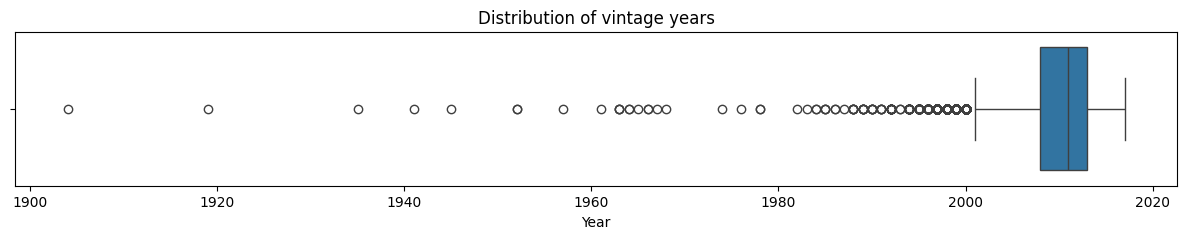

In [37]:
fig, ax = plt.subplots(figsize=(15, 2))
ax = sns.boxplot(reduced, x='year', orient='h')
ax.set_title('Distribution of vintage years')
ax.set_xlabel('Year')
plt.show()

In [38]:
reduced.query('year < 2000')

,country,description,points,price,taster_name,title,variety,winery,year,wine_style,type,quality,classification,location,band
367,Chile,"Aromas of mint, berry syrup and dense, lemony ...",88,10.0,Michael Schachner,De Martino 1999 Reserva de la Familia Carmenèr...,Carmenère,De Martino,1999,medium_red,red,medium,New World,Maipo Valley,value
369,Italy,This medium-weight wine flows effortlessly fro...,88,21.0,Joe Czerwinski,Ronco del Gelso 1999 Chardonnay (Friuli),Chardonnay,Ronco del Gelso,1999,full_white,white,medium,Old World,Friuli,premium
370,US,"Mint again, with earth and tobacco; one taster...",88,160.0,Unknown,Sebastiani 1991 Cherryblock Vineyard Cabernet ...,Cabernet Sauvignon,Sebastiani,1991,full_red,red,medium,New World,California,super luxury
375,Italy,"A soft, ripe wine that manages to showcase tob...",88,40.0,Unknown,Valiano 1997 Vino in Musica Sangiovese (Toscana),Sangiovese,Valiano,1997,medium_red,red,medium,Old World,Tuscany,ultra
388,US,"Delicate and complex, a cool climate wine with...",88,25.0,Roger Voss,Kynsi 1999 Paragon Vineyard Pinot Noir (Edna V...,Pinot Noir,Kynsi,1999,light_red,red,medium,New World,California,super
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127800,Italy,Bright and intense berry aromas lead into a ta...,85,18.0,Michael Schachner,Viticcio 1998 Riserva (Chianti Classico),Sangiovese,Viticcio,1998,medium_red,red,medium,Old World,Tuscany,premium
128681,France,"A Blanc de Blancs, from 100% Chardonnay, Deutz...",95,NaN,Roger Voss,Deutz 1999 Amour de Deutz Brut Chardonnay (Cha...,Chardonnay,Deutz,1999,full_white,white,high,Old World,Champagne,NaN
128688,France,There is no question this is a food Champagne....,94,170.0,Roger Voss,Deutz 1999 Cuvée William Deutz Rosé Brut (Cha...,Champagne Blend,Deutz,1999,sparkling,sparkling,high,Old World,Champagne,super luxury
128695,France,"A beautifully fine, elegant wine, the acidity ...",94,167.0,Roger Voss,Deutz 1999 Cuvée William Deutz Brut (Champagne),Champagne Blend,Deutz,1999,sparkling,sparkling,high,Old World,Champagne,super luxury


**Ignore wine vintages before 2000**

In [39]:
reduced = reduced.query('year >= 2000').copy()
reduced.info()
reduced.head()

<class 'pandas.core.frame.DataFrame'>
Index: 100538 entries, 0 to 129970
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100538 non-null  object 
 1   description     100538 non-null  object 
 2   points          100538 non-null  int64  
 3   price           93522 non-null   float64
 4   taster_name     100538 non-null  object 
 5   title           100538 non-null  object 
 6   variety         100538 non-null  object 
 7   winery          100538 non-null  object 
 8   year            100538 non-null  int64  
 9   wine_style      100538 non-null  object 
 10  type            100538 non-null  object 
 11  quality         100538 non-null  object 
 12  classification  100538 non-null  object 
 13  location        100538 non-null  object 
 14  band            93522 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 12.3+ MB


,country,description,points,price,taster_name,title,variety,winery,year,wine_style,type,quality,classification,location,band
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013,light_white,white,medium,Old World,Etna,NaN
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,medium_red,red,medium,Old World,Douro,popular
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,light_white,white,medium,New World,Oregon,popular
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,aromatic_white,white,medium,New World,Michigan,popular
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,light_red,red,medium,New World,Oregon,luxury


# Data Cleansing Summary

- dropped `designation`, `region_2` and `taster_twitter_handle` columns
- reduced the dataset to only include reviews on the top $50$ wine varieties from countries with more than $200$ reviews
- further reduced the dataset to reviews of wines from vintages that are from $2000$ or more recent.
- extracted vintage `year` from `title`
- derived `type` and `wine_style` from `variety`
- derived `quality` from `points`
- derived price `band` from `price`
- derived the *old* vs. *new* world classification from the `country` field
- derived `location` column from the `province`, `region_1`, `region_2` columns
- set missing `taster_name` to *Unknown*
- dropped remaining data missing `location` and `year`
- dropped duplicate reviews: reviews with duplicate`title` & `description`

Started with $129,971$ reviews, and ended up with $100,538$ reviews after data cleansing and data preparation.

# Saved the cleansed dataset

In [40]:
reduced.to_parquet('files/wine_review.parquet.gzip',compression='gzip')

# Next Step
- [exploratory data analysis](wine_review-eda.ipynb)